# How to Manipulate a Faust

<a name="start"></a>
This notebook is intended to introduce gently the operations available to manipulate a Faust object. 
It comes after the first notebook (available [here](https://faustgrp.gitlabpages.inria.fr/faust/last-doc/html/Faust_creation.ipynb) or as a web page [here](https://faustgrp.gitlabpages.inria.fr/faust/last-doc/html/Faust_creation.html)), so it's assumed you already know how to create a Faust object from one way or another.

Keep in mind that a full API doc is available [here](https://faustgrp.gitlabpages.inria.fr/faust/last-doc/html/namespacepyfaust.html) every time you need a detail and especially the Faust class is documented [here](https://faustgrp.gitlabpages.inria.fr/faust/last-doc/html/classpyfaust_1_1Faust.html).

# Table of Contents:

[**1. Getting Basic Information about a Faust Object**](#1.-Getting-Basic-Information-about-a-Faust-Object)<br/>
[1.1 Obtaining Dimension and Scalar Type Information](#1.1-Obtaining-Dimension-and-Scalar-Type-Information)<br/>
[1.2 Obtaining more Faust Specific Information](#1.2-Obtaining-more-Faust-Specific-Information)<br/>
[1.3 Plotting a Faust](#1.3-Plotting-a-Faust)<br/>
[1.4 About Sparsity!](#1.4-About-Sparsity!)<br/>

[**2. Faust Algebra and other Operations**](#2.-Faust-Algebra-and-other-Operations)<br/>
[2.1 Transpose, conjugate, transconjugate](#2.1-Transpose,-conjugate,-transconjugate)<br/>
[2.2 Add, Substract and Multiply](#2.2-Add,-Substract-and-Multiply)<br/>
[2.3 Faust Multiplication by a Vector or a Matrix](#2.3-Faust-Multiplication-by-a-Vector-or-a-Matrix)<br/>
[2.4 Faust Norms](#2.4-Faust-Norms)<br/>
[2.5 Faust Normalizations](#2.5-Faust-Normalizations)<br/>
[2.6 Faust Concatenation](#2.6-Faust-Concatenation)<br/>
[2.7 Faust Indexing and Slicing](#2.7-Faust-Indexing-and-Slicing)<br/>


# 1. Getting Basic Information about a Faust Object

First of all, given any object, you might ask yourself if it's a Faust or not (typically when you receive an object in a function, python being built on dynamic types, you can't say for sure it's a Faust). 
[Faust.isFaust()](https://faustgrp.gitlabpages.inria.fr/faust/last-doc/html/classpyfaust_1_1Faust.html#a965047e6c0161e59a1c3e08f2b60e806) is the function to verify an object is a Faust.
It's use is straighforward as you can see in the [documentation](https://faustgrp.gitlabpages.inria.fr/faust/last-doc/html/classpyfaust_1_1Faust.html#a965047e6c0161e59a1c3e08f2b60e806).


### 1.1 Obtaining Dimension and Scalar Type Information

Firstly, let's list basic Faust informative methods/attributes you're probably used to for numpy arrays:

- [shape](https://faustgrp.gitlabpages.inria.fr/faust/last-doc/html/classpyfaust_1_1Faust.html#a64b167c138d18a23bb5b9794fcb03ef1),
- [size](https://faustgrp.gitlabpages.inria.fr/faust/last-doc/html/classpyfaust_1_1Faust.html#a6505fdc600b4868bbe77d8fc4a48b350),
- [dtype](https://faustgrp.gitlabpages.inria.fr/faust/last-doc/html/classpyfaust_1_1Faust.html#ad0615fb9508899a95af2c7de42377e91).

To keep it really clear, let's show some examples operated on a random Faust.


In [ ]:
from pyfaust import FaustFactory as FF
F = FF.rand(5,10)
print(F)

In [ ]:
F.shape

In [ ]:
F.size

In [ ]:
F.dtype

If the attributes printed out above seem not clear to you, you're probably not a numpy user. Anyway you'll find all descriptive informations in the FAµST API documentation (see the links [above](#start)).

As a complement, you can also consult the numpy API documentation:
- [shape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html)
- [size](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.size.html)
- [dtype](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.dtype.html)

About shape, it's noteworthy that contrary to what numpy is capable of, you cannot [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.reshape.html) a Faust.


### 1.2 Obtaining more Faust Specific Information

As you've seen in this notebook and the [first one](#start), when you print a Faust object, several information appear.
Most of them are also available independently with specific functions.

For instance, if you want information about factors, nothing is more simple than calling directly the next functions:
- [get_num_factors()](https://faustgrp.gitlabpages.inria.fr/faust/last-doc/html/classpyfaust_1_1Faust.html#a2b46d3c068ef20d74bb90e382848014e) ; which gives you the number of factors (aka layers) a Faust object is composed of.
- [get_factor()](https://faustgrp.gitlabpages.inria.fr/faust/last-doc/html/classpyfaust_1_1Faust.html#adc91fd04c17ccaa2f32b7423955ef37d) ; which allows you to copy any of the Faust's factors givens it's index.

Going back to our F object, let's call the functions:

In [ ]:
F.get_num_factors()

For example, try to copy the third factor:

In [ ]:
f3 = F.get_factor(2)
f3

Note that, since Faust 2.3, the function doesn't alterate the factor format. If the Faust object contains a sparse factor then you'll receive a sparse (CSR) matrix. 


Contrary to what the singular form of 'get_factor' indicates, it's possible (since Faust 2.3 again) to retrieve a sub-sequence of Faust factors.

Go straight to the example, extracting factors from F:

In [ ]:
F.get_factor(range(2,4))

Hmm... something is different from the previous example. We indeed received a Faust as return type, great! You've just learned another way to create a Faust from another, additionally to what you've seen in the first [notebook](#start). 

Without this function, you'd surely have written something similar to:

In [ ]:
from pyfaust import Faust
F2 = Faust([F.get_factor(2), F.get_factor(3)])
F2

OK, that's not awful but I let you imagine how much complicated it is with more factors (even with a comprehension list, it's longer to write).

### 1.3 Plotting a Faust

It's quite useful to print a Faust as we've seen before, calling ``print(F)`` or ``F.display()`` or just ``F`` in an interactive terminal but this is wordy. 
How about plotting a Faust in a more graphical fashion ?

In [ ]:
import matplotlib.pyplot as plt
F.imshow()
plt.show()

What do we see above ? This is the Faust object resulting dense matrix on the left followed by the Faust's factors on the right.
Note that you can change the default [colormap](https://matplotlib.org/tutorials/colors/colormaps.html) in matplotlib parameters.

Look this another example to make it clearer.

In [ ]:
from pyfaust import Faust
from numpy import eye
Faust([eye(5,4),eye(4,10)]).imshow()

All factors are scaled to the same size, that's why the elements of factor 0 are bigger than factor 1 elements.

### 1.4 About Sparsity!

Three functions of the Faust class are here to evaluate the sparsity of a Faust object.

Let's call the first one:


In [ ]:
F.nnz_sum()

I'm sure you guessed exactly what the function returns, if you doubt it, here is the doc: [Faust.nnz_sum()](https://faustgrp.gitlabpages.inria.fr/faust/last-doc/html/classpyfaust_1_1Faust.html#a216c598bb384d92b4e37843b67c42255).

Next comes the reciprocal function: [Faust.density()](https://faustgrp.gitlabpages.inria.fr/faust/last-doc/html/classpyfaust_1_1Faust.html#af73ecb7c5fca3c7673c665d8ba4058f6).

This function along with [Faust.rcg()](https://faustgrp.gitlabpages.inria.fr/faust/last-doc/html/classpyfaust_1_1Faust.html#a6a51a05c20041504a0b8f2a73dd8d05a) can give you a big hint on how much your Faust is potentially optimized both for storage and calculation.

In [ ]:
F.density()

In [ ]:
F.rcg()

According to its RCG, this Faust doesn't seem to be of any help for optimization but look the graphic the next script generates: 

In [ ]:
from pyfaust import Faust, FaustFactory
import numpy as np
import os
import matplotlib.pyplot as plt 


nfactors = 3 
startd = 0.01
endd = 1 
dim_sz = 1000
sizes = []
rcs = []
ntests = 10
for i, d in zip(
                list(range(0, ntests)),
    np.linspace(startd, endd, ntests)):
    F = FaustFactory.rand(nfactors, dim_sz, d, fac_type='sparse')
    filepath = 'test_faust_size'+str(i)+'.mat'
    F.save(filepath)
    stat = os.stat(filepath)
    sizes.append(stat.st_size)
    rcs.append(F.density())
    os.remove(filepath)
    plt.title('File Size vs RC for Pure-Sparse Fausts \n('+str(nfactors)+' '
              'random factors '+str(dim_sz)+'x'+str(dim_sz)+')')
plt.xlabel('Relative Complexity/Density')
plt.ylabel('File Size (bytes)')
plt.rcParams['figure.figsize'] = [8.0, 6]
plt.tight_layout()
plt.plot(rcs, sizes)
plt.show()


Isn't it obvious now that the smaller the density the better?! Indeed, for two Faust objects of same shape and same number of factors, a smaller density (linearly) infers a smaller file size for storage.
This point applies also to the memory (RAM) space to work on a Faust.

We'll see later how the computation can make profit of a bigger RCG (or smaller density). But let's precise right now that the sparsity is often a tradeoff with accuracy, as the following plot shows about the truncated [SVD](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) of a matrix $M \in {\mathbb R}^{512 \times 512}$. Note beforehand that the M's SVD (truncated or not) can be seen as a Faust which approximates M.
```
Faust([U,S,V.H])
```
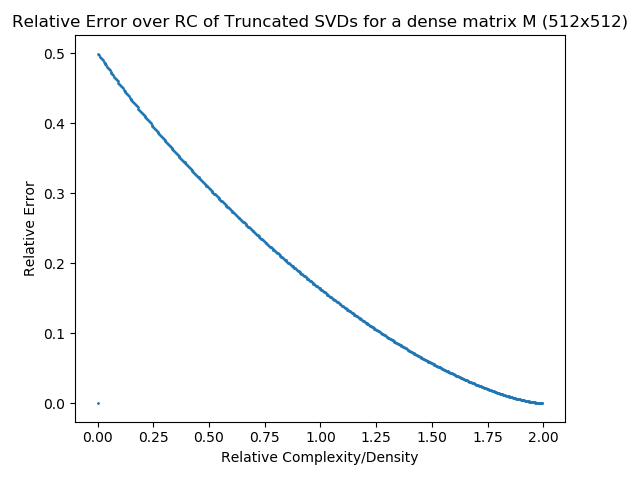

# 2. Faust Algebra and other Operations

In order to write some nice algorithms using Faust objects, you'll have to use the basic stable operations a Faust is capable of. Let's make a tour of them.

### 2.1 Transpose, conjugate, transconjugate

- [Faust.T](https://faustgrp.gitlabpages.inria.fr/faust/last-doc/html/classpyfaust_1_1Faust.html#a064a412cac321f8211098db0fae84e8e)
- [Faust.conj](https://faustgrp.gitlabpages.inria.fr/faust/last-doc/html/classpyfaust_1_1Faust.html#abd273a0e1684a7b238798ac82cd07a61)
- [Faust.H](https://faustgrp.gitlabpages.inria.fr/faust/last-doc/html/classpyfaust_1_1Faust.html#ac7b77cdde5f66f85b6458594aa01ad31)

You must be familiar with T and H attributes/properties from numpy/scipy. Well, they are also used in Faust class.

In [ ]:
G = FF.rand(5,[10,15],field='complex')

In [ ]:
G.T

In [ ]:
G.conj()

In [ ]:
G.H

What really matters here is that G.T, G.conj() and G.H results are all Faust objects, but behind the scene, there is just one memory zone allocated to the factors. Strictly speaking they are memory views shared between G, G.T and G.H. So don't hesitate to use!


### 2.2 Add, Substract and Multiply


In [ ]:
F = FF.rand(5,G.shape[0])
G = FF.rand(5,G.shape[0])
F+G

Go ahead and verify it's accurate.

In [ ]:
from numpy.linalg import norm
norm((F+G).toarray()-(F.toarray()+G.toarray()))

Some points are noticeable here:
- F is real (dtype float), but G is complex. Faust API is able to return the proper resulting Faust, that is a complex Faust.
- F+G is composed of 8 factors, however F and G are both 5 factors long. It's due to the way the addition is implemented (Faust concatenation is hiding behind).

Substracting is not different:

In [ ]:
F-G

You can also add/substract scalars to Faust objects.

In [ ]:
F+2

Now let's multiply these Fausts!

In [ ]:
FG = F*G

In [ ]:
norm(FG.todense()-F.todense()*G.todense())/norm(F.todense()*G.todense())

The relative error proves it's working.
FG is a Faust too!

In [ ]:
Faust.isFaust(FG)

Faust scalar multiplication is also available and here again the result is a Faust object!

In [ ]:
F*2

### 2.3 Faust Multiplication by a Vector or a Matrix

When you multiply a Faust by a vector or a matrix (which must be dense by the way -- more precisely, a ```numpy.ndarray``` with good ```ndim``` and ```shape```), you'll get respectively a vector or a matrix as result. 

In [ ]:
from numpy.random import rand
vec = rand(F.shape[1],1)
F@vec # or F.dot(vec), F*vec

Let's launch a timer to compare the execution times of Faust-vector multiplication and Faust's dense matrix-vector multiplication

Note that appliying a Faust on a ```numpy.ndarray``` or a ```numpy.matrix``` can be done with the operator @ or \* exactly as ```numpy.matrix``` allows. Indeed, a Faust is to be seen as a ```numpy.matrix``` not a ```numpy.ndarray``` (for the latter the two operators are not the same, \* performs an elementwise multiplication while @ is the matrix product).

In [ ]:
timeit F@vec

In [ ]:
FD = F.toarray()

In [ ]:
timeit FD@vec

In [ ]:
F.rcg()

When the RCG is lower than 1 the Faust-vector multiplication is slower. Making a random Faust with a big RCG shows better results.

In [ ]:
G = FF.rand(3, 1024, density=.001, fac_type='sparse')
GD = G.toarray()
vec2 = rand(1024, 1) 

In [ ]:
timeit G@vec2

In [ ]:
timeit GD@vec2

In [ ]:
G.rcg()

It goes without saying that a big RCG gives a big speedup to the Faust-vector multiplication relatively to the corresponding (dense) matrix-vector multiplication.
I hope the example above has finished to convince you.

Just to convince you as well of the Faust-vector multiplication accuracy:

In [ ]:
from numpy.linalg import norm
norm(G@vec2 - GD@vec2)

What applies to Faust-vector multiplication remains valid about Faust-matrix multiplication. Take a look:

In [ ]:
M = FF.rand(1,1024,density=.001,fac_type='dense').get_factor(0)

In [ ]:
timeit G@M

In [ ]:
timeit GD@M

In [ ]:
norm(GD@M-G@M)/norm(GD@M)

Well, what do we see? A quicker Faust-matrix multiplication than the matrix-matrix corresponding multiplication, though a good accuracy of the Faust-matrix multiplication is also clearly confirmed.

These examples are somehow theoretical because we cherry-pick the Faust we know the RCG is good to accelerate the muplication, but at least it shows the potential speedup using Faust objects.

### 2.4 Faust Norms

The Faust class provides a norm function which handles different types of norms. 
This function is really close to ```numpy.linalg.norm``` function.

In the following example, the three of four norms available are computed.

In [ ]:
F.norm(1)

In [ ]:
import math
F.norm(math.inf)

In [ ]:
F.norm('fro')

Now, check the values are not far from the Faust's dense matrix.

In [ ]:
from numpy.linalg import norm
norm(F.todense(),1)

In [ ]:
norm(F.todense(),math.inf)

In [ ]:
norm(F.todense(), 'fro')

Perfect! But a last norm is available, this is the Faust's 2-norm. Let's see in the next small benchmark how the Faust 2-norm is being computed faster than the Faust's dense matrix 2-norm. 

In [ ]:
timeit -n 10 G.norm(2)

In [ ]:
timeit -n 10 norm(GD,2) # sorry, it could be slow

The power-iteration algorithm implemented in the FAµST C++ core is faster on G and the relative error is not bad too.

In [ ]:
err = abs((G.norm(2)-norm(GD,2))/norm(GD,2))
err

### 2.5 Faust Normalizations

The FAµST API proposes a group of normalizations. They correspond to the norms available and discussed above.

It's possible to normalize along columns or rows with any type of these norms.

In [ ]:
F = FF.rand(5,10)
NF = F.normalize()

The API doc is [here](https://faustgrp.gitlabpages.inria.fr/faust/last-doc/html/classpyfaust_1_1Faust.html#ae93af25bb48c768fd0d08e71631e9dac).

What's interesting here is the fact that ```Faust.normalize``` returns a Faust object. It's useful to rewrite algorithms like OMP upon FAµST API (as well as slicing as you'll see in next section).

The normalization coded in C++ is memory optimized by not constructed the dense matrix to retrieve any column or row. In the same goal the factors composing the Faust object NF are not duplicated in memory, they're used as is with an additional factor giving the appropriate scaling.

In [ ]:
F

In [ ]:
NF

In [ ]:
NF.get_factor(5).todense()

In [ ]:
cumerr = 0
for i in range(0,F.shape[1]): 
    cumerr += norm(NF.todense()[:,i]-F.todense()[:,i]/norm(F.todense()[:,i]))
cumerr

And as you see it works!

### 2.6 Faust Concatenation

You're probably aware of numpy arrays concatenation otherwise look this example.

In [ ]:
from numpy.random import rand
from numpy import eye, concatenate
M = rand(5,5)
I = eye(5,5)
concatenate((M,I))

In [ ]:
# it was vertical concatenation, now let's concatenate horizontally
concatenate((M,I), axis=1)

As you I'm sure you guessed that likewise you can concatenate Faust objects.

In [ ]:
F.concatenate(F)

In [ ]:
C = F.concatenate(F, axis=1)

In [ ]:
C.todense()-concatenate((F.todense(), F.todense()),axis=1)

The difference of the two concatenations is full of zeros, so of course it works!

As you noticed the Faust concatenation is stable, you give two Fausts and you get a Faust again.
Besides, it's possible to concatenate an arbitrary number of Faust objects.


In [ ]:
F.concatenate(F, C, C, F, axis=1)

As an exercise, you can write the factors of the Faust ```F.concatenate(F)```, F being any Faust. 

**Hint**: the block-diagonal matrices are around here.

### 2.7 Faust Indexing and Slicing

Sometimes you need to consult the Faust's dense matrix or even an element of it (by the way, take in note that it's costful).

Let's access a Faust item:

In [ ]:
F[2,3]

Why is it costful? Because it computes the whole product to access one item.

In [ ]:
timeit F[2,3]

In [ ]:
timeit FD[2,3]

It's totally the same syntax as numpy but much slower so use it with care. 

The more advanced slicing operation uses also the same syntax as numpy:

In [ ]:
F[2:5, 3:10]

Here again, the result is another Faust. But this is not a full copy, it makes profit of memory views implemented behind in C++. Solely the first and last factors of the sliced Faust are new in memory, the other are just referenced from the initial Faust F. So use it with no worry for a Faust with a lot of factors!


The numpy's fancy indexing has also been implemented in the FAµST C++ core, let's try it:

In [ ]:
FI = F[[1,3,2],:]
Faust.isFaust(FI)

Again, it's a Faust but is it really working? Verify!

In [ ]:
(FI.todense()[0] == F.todense()[1]).all() and \
(FI.todense()[1] == F.todense()[3]).all() and \
(FI.todense()[2] == F.todense()[2]).all()

Yes it is!

-----

This is the notebook's end, you have now a global view of what the Faust class is able and what kind of high-level algorithms it is ready for. You might be interested to read other notebooks, just go back to the page where you got this one.